In [150]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import nltk
import string
import emoji
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [151]:
#Load the dataset
data = pd.read_csv('../data/sentimentdataset.csv')

#Show the data
data.head


<bound method NDFrame.head of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
749           750         754   
750           751         755   
751           752         756   
752           753         757   
753           754         758   

                                                  Text      Sentiment  \
0     Enjoying a beautiful day at the park!        ...     Positive     
1     Traffic was terrible this morning.           ...     Negative     
2     Just finished an amazing workout! 💪          ...     Positive     
3     Excited about the upcoming weekend getaway!  ...     Positive     
4     Trying out a new recipe for dinner tonight.  ...     Neutral      
..                                                 ...            ...   
749  Experiencing a lack of motivation to participa...   Unmot

In [152]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [153]:
# Drop the specified columns from the data DataFrame
data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)


In [154]:
data.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [155]:
data.shape

(754, 2)

In [156]:
dict(data['Sentiment'].value_counts())

{' Positive  ': 44,
 ' Joy ': 42,
 ' Excitement ': 32,
 ' Contentment ': 14,
 ' Happy ': 14,
 ' Neutral ': 14,
 ' Gratitude ': 9,
 ' Hopeful ': 9,
 ' Loneliness ': 9,
 ' Sad ': 9,
 ' Embarrassed ': 8,
 ' Curiosity ': 8,
 ' Frustration ': 7,
 ' Bad ': 6,
 ' Playful ': 6,
 ' Hate ': 6,
 ' Despair ': 6,
 ' Elation       ': 6,
 ' Indifference    ': 5,
 ' Empowerment   ': 5,
 ' Enthusiasm    ': 5,
 ' Inspired ': 5,
 ' Acceptance      ': 5,
 ' Serenity        ': 5,
 ' Determination   ': 5,
 ' Contentment   ': 5,
 ' Ambivalence     ': 5,
 ' Nostalgia       ': 5,
 ' Melancholy      ': 5,
 ' Numbness        ': 5,
 ' Confusion       ': 5,
 ' Serenity      ': 5,
 ' Gratitude     ': 5,
 ' Curiosity       ': 5,
 ' Overwhelmed ': 5,
 ' Bitterness ': 5,
 ' Frustrated ': 5,
 ' Grateful ': 4,
 ' Neutral   ': 4,
 ' Betrayal ': 4,
 ' Grief ': 4,
 ' Desolation ': 4,
 ' Awe ': 4,
 ' Nostalgia ': 4,
 ' Inspiration ': 4,
 ' Negative  ': 4,
 ' Proud ': 4,
 ' Euphoria      ': 4,
 ' Arousal       ': 4,
 ' Hope 

In [157]:
data['Sentiment'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
749    False
750    False
751    False
752    False
753    False
Name: Sentiment, Length: 754, dtype: bool

In [158]:
#Let's look at the number of unique sentiments
data['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

The output above resulted in 279 unique sentiments ,so we have to scale it down into a smaller number . I prefer mapping each sentiment to positive,negative and neutral

In [159]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get VADER sentiment
def get_vader_sentiment(sentiment):
    score = analyzer.polarity_scores(sentiment)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Get the list of sentiments from the data
sentiments = data['Sentiment'].tolist()

# Apply the VADER sentiment analysis to each sentiment
sentiments = [get_vader_sentiment(sentiment) for sentiment in sentiments]

# Create a new column 'Category' in the data with the VADER sentiment results
data['Category'] = pd.Series(sentiments)

# Display the value counts of each category
data['Category'].value_counts()

Category
Positive    380
Negative    203
Neutral     171
Name: count, dtype: int64


This code implements sentiment analysis using VADER (Valence Aware Dictionary and sEntiment Reasoner):

1. VADER Initialization:
    - Imports and initializes VADER, a sentiment analysis tool specifically attuned to social media content
    - Creates an analyzer object to perform sentiment scoring

2. Sentiment Classification Function: 
    - Defines get_vader_sentiment() that takes a text input
    - Uses VADER to compute polarity scores (compound score between -1 to 1)
    - Classifies text as:
      - Positive if compound score ≥ 0.05
      - Negative if compound score ≤ -0.05 
      - Neutral otherwise

3. Data Processing:
    - Extracts sentiments from 'Sentiment' column into a list
    - Applies VADER analysis to each sentiment using list comprehension
    - Creates new 'Category' column with VADER classifications
    - Shows frequency distribution of sentiment categories

Key purpose: Reduces the original 279 unique sentiments into 3 standardized categories (Positive, Negative, Neutral) using VADER's lexicon-based approach.


In [160]:
#After transformation here's how it looks
data.head()

,Text,Sentiment,Category
0,Enjoying a beautiful day at the park! ...,Positive,Positive
1,Traffic was terrible this morning. ...,Negative,Negative
2,Just finished an amazing workout! 💪 ...,Positive,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,Neutral


In [161]:
data['Sentiment'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
749    False
750    False
751    False
752    False
753    False
Name: Sentiment, Length: 754, dtype: bool

In [162]:
## We shall perform text preprocessing on our data for better results

def transform_emojis(text):
    return emoji.demojize(text)

def preprocess_text(text):
    if not isinstance(text, str):
        return text

    # Transform emojis
    text = transform_emojis(text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Tokenize
    tokens = word_tokenize(text)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]

    return tokens

data['PrText']=data['Text'].apply(preprocess_text)

In [163]:
#After transformation here's how it looks
data.head()

,Text,Sentiment,Category,PrText
0,Enjoying a beautiful day at the park! ...,Positive,Positive,"[enjoying, beautiful, day, park]"
1,Traffic was terrible this morning. ...,Negative,Negative,"[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,Positive,Positive,"[finished, amazing, workout, flexedbiceps]"
3,Excited about the upcoming weekend getaway! ...,Positive,Positive,"[excited, upcoming, weekend, getaway]"
4,Trying out a new recipe for dinner tonight. ...,Neutral,Neutral,"[trying, new, recipe, dinner, tonight]"


In [164]:
# Import necessary libraries for word embedding
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Function to vectorize tokens using the Word2Vec model
def vectorize(tokens, model):
  # Filter out tokens that are not in the model's vocabulary
  valid_tokens = [token for token in tokens if token in model.wv.index_to_key]
  
  # If no valid tokens, return a zero vector
  if not valid_tokens:
    return np.zeros(model.vector_size)
  
  # Compute the mean vector of the valid tokens
  return np.mean([model.wv[token] for token in valid_tokens], axis=0)

# Train a Word2Vec model on the preprocessed text data
model = Word2Vec(data['PrText'].tolist(), vector_size=100, window=5, min_count=1)

# Apply the vectorize function to each preprocessed text and store the result in a new column 'Embeddings'
data['Embeddings'] = data['PrText'].apply(lambda x: vectorize(x, model))

# Display the first few rows of the 'Embeddings' column
data['Embeddings'].head()

0    [-0.0017238942, -0.0008393276, 0.0006918018, 0...
1    [0.0010469207, -0.001561679, 0.00065946486, 0....
2    [0.00211867, 0.002076908, -0.002133129, 0.0023...
3    [0.00081116904, 0.0018183318, 0.0023274252, -0...
4    [-0.0012630923, 0.0015162649, 0.002910695, 0.0...
Name: Embeddings, dtype: object

Embeddings are a way to represent text data in a numerical format that can be used by machine learning models. They capture the semantic meaning of words or phrases by mapping them to vectors in a continuous vector space. The purpose of embeddings is to:

1. **Capture Semantic Relationships**: Embeddings capture the semantic relationships between words. Words with similar meanings are mapped to vectors that are close to each other in the vector space.

2. **Dimensionality Reduction**: Embeddings reduce the dimensionality of text data, making it more manageable for machine learning models. Instead of representing words as high-dimensional sparse vectors (e.g., one-hot encoding), embeddings represent them as dense vectors of lower dimensions.

3. **Improve Model Performance**: By providing a meaningful numerical representation of text, embeddings can improve the performance of machine learning models on tasks such as classification, clustering, and regression.

The embeddings are used to convert the preprocessed text data into numerical vectors that can be fed into machine learning models for sentiment analysis.


In [165]:
data.head()

,Text,Sentiment,Category,PrText,Embeddings
0,Enjoying a beautiful day at the park! ...,Positive,Positive,"[enjoying, beautiful, day, park]","[-0.0017238942, -0.0008393276, 0.0006918018, 0..."
1,Traffic was terrible this morning. ...,Negative,Negative,"[traffic, terrible, morning]","[0.0010469207, -0.001561679, 0.00065946486, 0...."
2,Just finished an amazing workout! 💪 ...,Positive,Positive,"[finished, amazing, workout, flexedbiceps]","[0.00211867, 0.002076908, -0.002133129, 0.0023..."
3,Excited about the upcoming weekend getaway! ...,Positive,Positive,"[excited, upcoming, weekend, getaway]","[0.00081116904, 0.0018183318, 0.0023274252, -0..."
4,Trying out a new recipe for dinner tonight. ...,Neutral,Neutral,"[trying, new, recipe, dinner, tonight]","[-0.0012630923, 0.0015162649, 0.002910695, 0.0..."


In [166]:
#Let's look at the number of unique sentiments
data['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [167]:
#Replace positives with 1 neutral with 0 and negaitves with -1
def label(category):
  if category == 'Positive':
    return 1
  elif category == 'Negative':
    return -1
  elif category == 'Neutral':
    return 0
data['Category']=data['Category'].apply(lambda x: label(x))

X=np.vstack(data['Embeddings'])
y=data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


### Data Preprocessing for Model Training

The code performs two key tasks:

1. **Sentiment Label Encoding**
- Converts text sentiment labels into numerical values:
    - Positive → 1
    - Neutral → 0  
    - Negative → -1
- This encoding allows the sentiment categories to be used in machine learning algorithms

2. **Data Preparation**
- Creates feature matrix X by stacking word embeddings vectors
- Sets target variable y as the encoded sentiment labels
- Splits data into training (90%) and test (10%) sets
    - Training set: Used to train the models
    - Test set: Used to evaluate model performance
- Random state is set to 42 for reproducibility


In [168]:
# Train the Logistic Regression classifier
lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lr_classifier.predict(X_test)

# Print the classification report and accuracy
print(classification_report(y_test, y_pred, zero_division=0))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))



              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.00      0.00      0.00        19
           1       0.58      1.00      0.73        44

    accuracy                           0.58        76
   macro avg       0.19      0.33      0.24        76
weighted avg       0.34      0.58      0.42        76

Accuracy: 0.58


In [169]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Print the classification report and accuracy
print(classification_report(y_test, y_pred_knn, zero_division=0))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: {:.2f}".format(accuracy_knn))


              precision    recall  f1-score   support

          -1       0.57      0.62      0.59        13
           0       0.58      0.58      0.58        19
           1       0.79      0.77      0.78        44

    accuracy                           0.70        76
   macro avg       0.65      0.66      0.65        76
weighted avg       0.70      0.70      0.70        76

KNN Accuracy: 0.70


In [170]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_nb = nb_classifier.predict(X_test)

# Print the classification report and accuracy
print(classification_report(y_test, y_pred_nb))
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy: {:.2f}".format(accuracy_nb))

              precision    recall  f1-score   support

          -1       0.47      0.62      0.53        13
           0       0.50      0.47      0.49        19
           1       0.73      0.68      0.71        44

    accuracy                           0.62        76
   macro avg       0.57      0.59      0.58        76
weighted avg       0.63      0.62      0.62        76

Naive Bayes Accuracy: 0.62


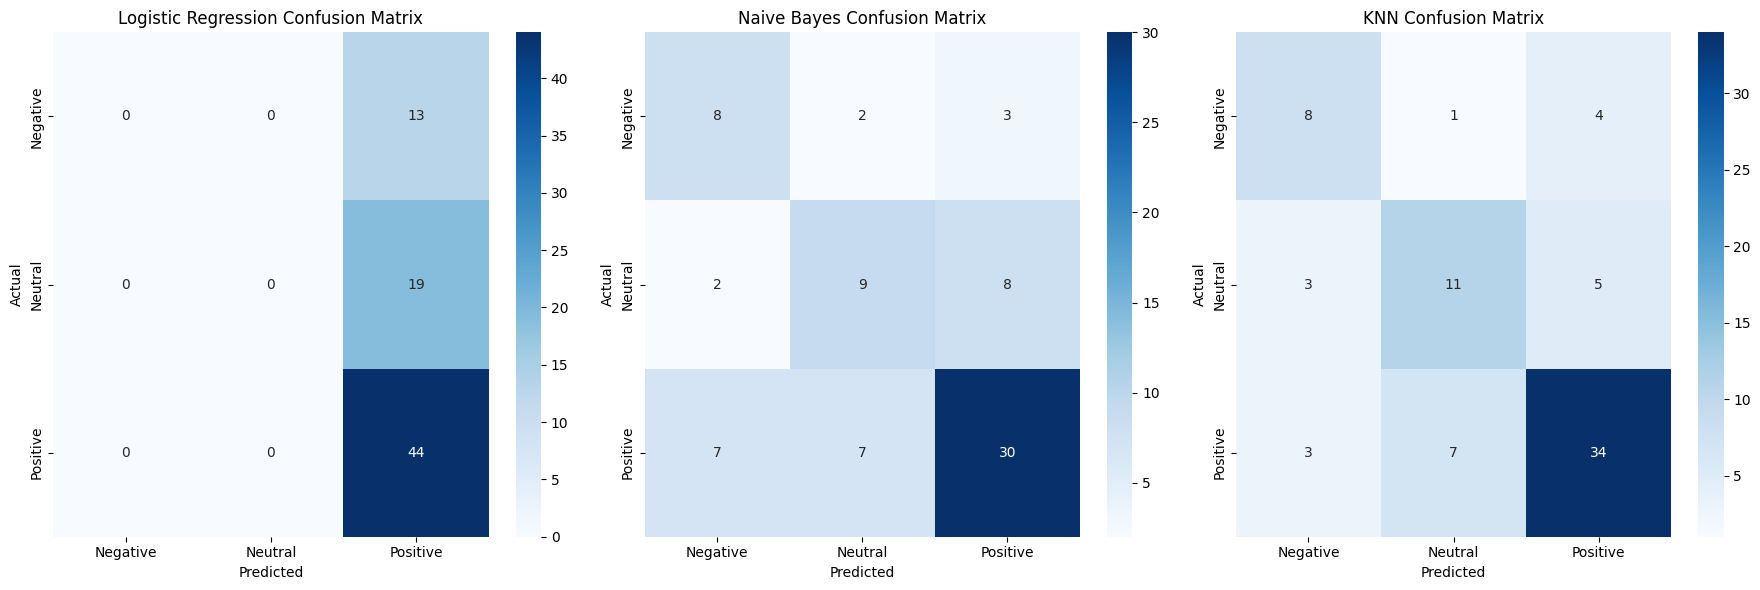

In [171]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_logistic = confusion_matrix(y_test, y_pred)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Plot confusion matrix for KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], ax=axes[2])
axes[2].set_title('KNN Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


**Interpretation of the Confusion Matrices**  
- **Logistic Regression** predicts almost every instance as Positive, resulting in zero correct classifications for Negative and Neutral classes.  
- **Naive Bayes distributes** predictions across all classes, but some misclassifications occur, especially between Positive and Neutral.  
- **KNN shows better balance** and higher correct predictions for each class, indicating comparatively better overall performance.  

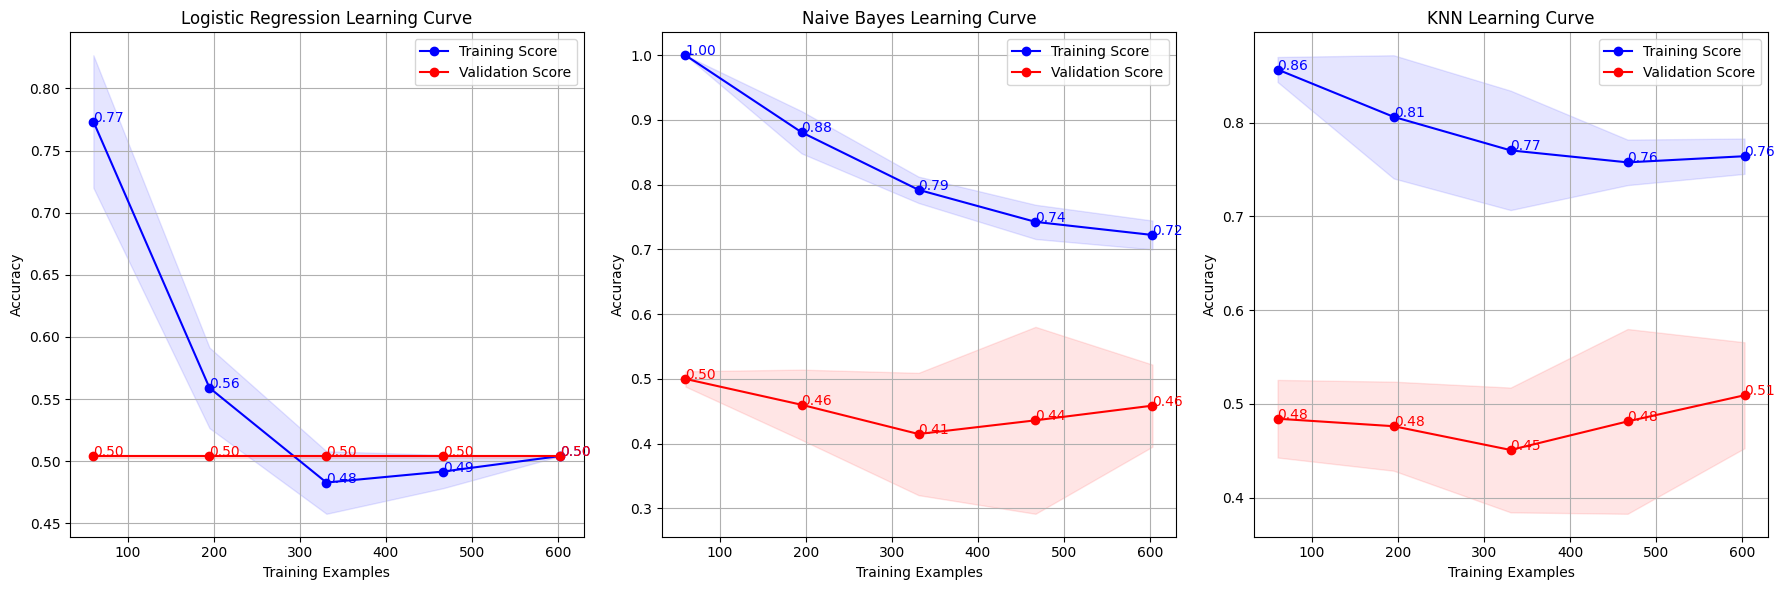

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, model_inst) in zip(axes, models_dict.items()):
    train_sizes, train_scores, val_scores = learning_curve(
        model_inst, X, y, cv=5, scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    ax.plot(train_sizes, train_mean, marker='o', label='Training Score', color='blue')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)

    ax.plot(train_sizes, val_mean, marker='o', label='Validation Score', color='red')
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.1)

    for x_val, y_val in zip(train_sizes, train_mean):
        ax.text(x_val, y_val, f"{y_val:.2f}", color='blue')
    for x_val, y_val in zip(train_sizes, val_mean):
        ax.text(x_val, y_val, f"{y_val:.2f}", color='red')

    ax.set_title(f'{name} Learning Curve')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

**Learning Curves Analysis**

**Logistic Regression**
- Training score starts high (~0.85) but gradually decreases to ~0.76 as more data is added
- Validation score remains consistently low (~0.48) regardless of training size
- Large gap between training and validation scores indicates high variance (overfitting)

**Naive Bayes**
- Training accuracy is moderate (~0.65-0.75)
- Validation accuracy fluctuates around 0.45-0.50
- Smaller gap between training and validation scores compared to Logistic Regression
- More stable learning curve but shows signs of high bias (underfitting)

**KNN**
- Training accuracy starts high (~0.85) and gradually decreases
- Validation accuracy improves slightly with more data, reaching ~0.51
- Shows moderate gap between training and validation scores
- Best generalization among the three models though still room for improvement

Overall, all models show signs of either overfitting or underfitting. KNN appears to have the most balanced performance but the models could benefit from:
- Feature engineering
- Hyperparameter tuning 
- Collecting more training data

### Input Testing using the models:

In [173]:
# Function to analyze sentiment of user input
def analyze_sentiment(user_input):
    # Preprocess the user input
    preprocessed_input = preprocess_text(user_input)
    
    # Vectorize the preprocessed input
    input_vector = vectorize(preprocessed_input, model).reshape(1, -1)
    
    # Predict sentiment using Logistic Regression classifier
    logistic_pred = lr_classifier.predict(input_vector)
    
    # Predict sentiment using Naive Bayes classifier
    nb_pred = nb_classifier.predict(input_vector)
    
    # Predict sentiment using KNN classifier
    knn_pred = knn_classifier.predict(input_vector)
    
    # Map predictions to sentiment labels
    sentiment_map = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
    logistic_sentiment = sentiment_map[logistic_pred[0]]
    nb_sentiment = sentiment_map[nb_pred[0]]
    knn_sentiment = sentiment_map[knn_pred[0]]
    
    return {
        'Logistic Regression': logistic_sentiment,
        'Naive Bayes': nb_sentiment,
        'KNN': knn_sentiment
    }

# Ask for user input
test = input("Write test sentence:")

# Analyze the sentiment of the user input
result = analyze_sentiment(test)

# Print the results
print("Logistic Regression Sentiment:", result['Logistic Regression'])
print("Naive Bayes Sentiment:", result['Naive Bayes'])
print("KNN Sentiment:", result['KNN'])


Logistic Regression Sentiment: Positive
Naive Bayes Sentiment: Neutral
KNN Sentiment: Positive



The code takes a user’s text input, preprocesses and vectorizes it, then uses three separate models (Logistic Regression, Naive Bayes, and KNN) to classify the sentiment as “Positive,” “Negative,” or “Neutral.” It returns each classifier’s prediction and outputes them.